<a href="https://colab.research.google.com/github/joseph-c-mcguire/Math-of-data-science/blob/main/MATH_476_Python_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Networkx Tutorial
This will be a tutorial for some basic operations we'll be using the Panda, Networkx and Sklearn Python libraries.

## Simple Graphs in Networkx
Let's get familiar with some basic opertions in Networkx.

The Adjacency Matrix of G
[[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
The Laplacian of G
[[ 2 -1 -1]
 [-1  1  0]
 [-1  0  1]]


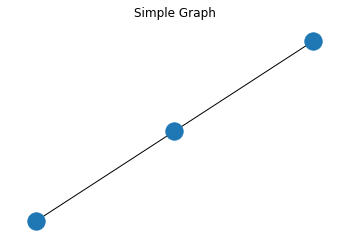

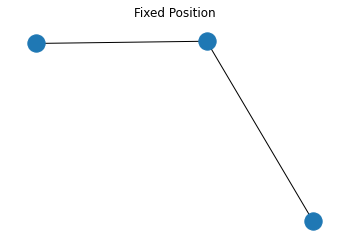

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sci

# Initializes an Empty Simple Graph
G = nx.Graph()
# Add edges to the graph from a list of edge pairs
edges = [(0,1),(1,0),(2,0),(2,0)]
G.add_edges_from(edges)
# Initialize a figure that we'll then draw our graph in
## By default Netoworkx assumes you're working with a simple graph
plt.figure(0)
plt.title('Simple Graph')
nx.draw(G)
# The layout of this is completely random, so to fix this we'll use a layout to fix this image to be the same each time
## Spring layout is a common one, although there are many others
plt.figure(1)
plt.title('Fixed Position')
pos = nx.spring_layout(G, seed = 0)
nx.draw(G, pos = pos)
# The Adjacency Matrix of a graph will be in a sparse matrix format,
# which we can convert to a full matrix using the Scipy library
A = nx.to_numpy_matrix(G)
print('The Adjacency Matrix of G')
print(A)
# The Laplacian Matrix is similar, but is stored as a sparse scipy array,
# to convert we use scipy's .to_array function
L = nx.laplacian_matrix(G)
L = L.toarray()
print('The Laplacian of G')
print(L)

## Directed Graphs
The above example, except done for a directed graph. (The Laplacian matrix is commented out as Networkx doesn't have this implemented for directed graphs.)

I turn the node labels on for this example.

The Adjacency Matrix of G
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 0.]]


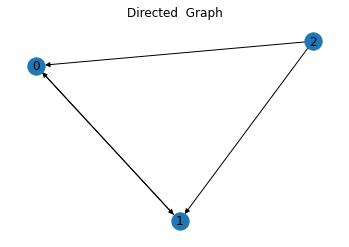

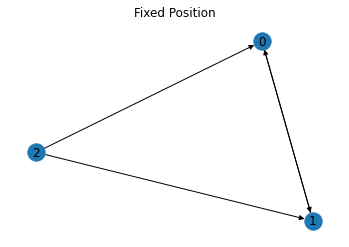

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sci

# Initializes an Empty Directed Graph
G = nx.DiGraph()
# Add edges to the graph from a list of edge pairs
edges = [(0,1),(1,0),(2,0),(2,1)]
G.add_edges_from(edges)
# Initialize a figure that we'll then draw our graph in
## By default Netoworkx assumes you're working with a simple graph
plt.figure(0)
plt.title('Directed  Graph')
nx.draw(G, with_labels= True)
# The layout of this is completely random, so to fix this we'll use a layout to fix this image to be the same each time
## Spring layout is a common one, although there are many others
plt.figure(1)
plt.title('Fixed Position')
pos = nx.spring_layout(G, seed = 0)
nx.draw(G, pos = pos, with_labels = True)
# The Adjacency Matrix of a graph will be in a sparse matrix format,
# which we can convert to a full matrix using the Scipy library
A = nx.to_numpy_matrix(G)
print('The Adjacency Matrix of G')
print(A)
# # The Laplacian Matrix is similar, but is stored as a sparse scipy array,
# # to convert we use scipy's .to_array function
# L = nx.laplacian_matrix(G)
# L = L.toarray()
# print('The Laplacian of G')
# print(L)

## Linear Algebra on Graphs

In [ ]:
import networkx as nx
import numpy as np
import numpy.linalg as linalg
# Initializes an Empty Directed Graph
G = nx.DiGraph()
# Add edges to the graph from a list of edge pairs
edges = [(0,1),(1,0),(2,0),(2,1)]
G.
# To get the Eigenvalues and vectors of A we can use numpy.linalg
print('eigenvalues of A are stored in the first entry of A')
print(linalg.eig(A)[0])
print('eigenvectors of A are stored in the second entry of A')
print(linalg.eig(A)[1])

eigenvalues of A are stored in the first entry of A
[ 0.  1. -1.]
eigenvectors of A are stored in the second entry of A
[[ 0.          0.40824829  0.70710678]
 [ 0.          0.40824829 -0.70710678]
 [ 1.          0.81649658  0.        ]]


## nx.draw with Weighted Graphs

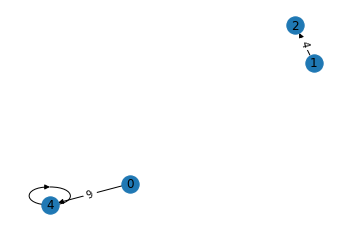

In [ ]:
import networkx as nx
import numpy.random as rand
import matplotlib.pyplot as plt
# We'll show this for a directed graph
G = nx.DiGraph()
# To add weighted edges to a graph, we'll need to use the "add_weighted_edges_from"
# command, give it a list[(u,v,w),(a,b,m)] the first component is the source and the second
# is the target, and the third is a weight. 
for i in range(0,3):
  G.add_weighted_edges_from([(rand.randint(0,5), rand.randint(0,5), rand.randint(0,10))])
# Create a figuer
fig = plt.figure(1)
# select a layout
pos = nx.spring_layout(G)
# this will give us the weights of each edge
labels = nx.get_edge_attributes(G,'weight')
# we then draw the weights on the graph
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels=labels)
# finally draw the graph
nx.draw(G, pos = pos, with_labels = True)

# Random Graphs/Stochastic Block Models 

We'll explore the different kinds of random graphs that networkx works with.

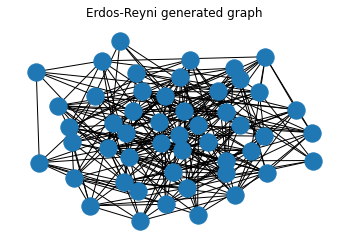

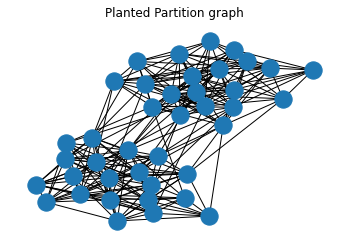

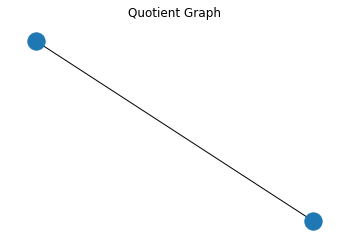

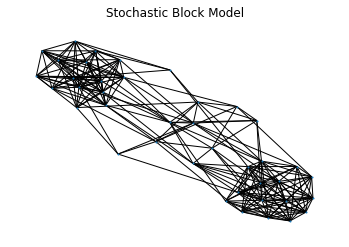

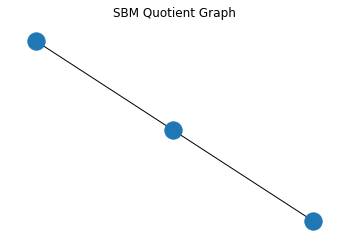

In [ ]:
from platform import node
import networkx as nx
import matplotlib.pyplot as plt
# The most simple kind of random graph we'll use is a Erdos-Reyni generated graph
## The way it works is that we start with N nodes, then each node pair has a probability
## of p of being joined by an edge, to fix the generated graph to be the same for reproducibility we can set a seed
G_ER = nx.erdos_renyi_graph(n = 50, p = 0.25, seed = 0)
plt.figure(0)
plt.title("Erdos-Reyni generated graph")
nx.draw(G_ER)

# The next type is called a Planted Partition model
## The way this works is that we start with l groups each with k members
## the probability that a pair of nodes is joined within a cluster is p_in
## the probability that a pair of nodes is joined between two clusters is p_out
## seed makes sure this is the same each time
G_PP = nx.planted_partition_graph(l = 2, k = 20, p_in = 0.6, p_out = 0.05, seed = 0)
plt.figure(1)
plt.title('Planted Partition graph')
nx.draw(G_PP)
## To get the partitions that were used to form this graph, we can use the following:
H = G_PP.graph['partition']
## It ocassionally might be useful to graph this with each cluster as a node, this
## objects is called a Quotient Graph.
H = nx.quotient_graph(G_PP, H)
plt.figure(2)
plt.title('Quotient Graph')
nx.draw(H)
# The most general kind of random graph we can produce is the Stochastic Block Model
## We need the size of each cluster, in a list of size k
## We need a matrix P, whose P_ij element tells us the probability that a node from group i is joined 
## to a node in group j. P needs to be a k x k matrix.
P = [[0.5, 0.1, 0.1],
     [0.1, 0.75, 0],
     [0.1, 0, 0.8]]
G_SBM = nx.stochastic_block_model([10, 15, 15], P, seed = 0)
plt.figure(3)
plt.title('Stochastic Block Model')
nx.draw(G_SBM, node_size = 1)
H_SBM = G_SBM.graph['partition']
H_SBM = nx.quotient_graph(G_SBM, H_SBM)
plt.figure(4)
plt.title('SBM Quotient Graph')
nx.draw(H_SBM)

# Pandas to Networkx Tutorial

We need data to first build a graph, we'll be using a data set of citations between High Energy Physicists as an example data set (https://www.kaggle.com/wolfram77/graph-snap-cit-hepph).

This data is already given to us in the form of node1 -> node2. 
Where one column "# FromNodeId" is the source column, and the other "ToNodeID" is the target column.
This form of storing graph information is called an edgelist.
So this will be a directed graph.

In [ ]:
# import the necessary libraries
import pandas as pd
# read in the data, this is a text file seperated by tabs and the first 3 rows 
# of the file are not needed, so we use the 'sep' command and 'skiprows' command
dataframe = pd.read_csv('https://raw.githubusercontent.com/joseph-c-mcguire/Math-of-data-science/main/Python%20Tutorial/cit-HepPh.txt', sep = '\t',skiprows=3)
# The object Pandas produces is called a "DataFrame"
print(dataframe)
# Networkx can interact with a dataframes directly:
G = nx.from_pandas_edgelist(dataframe, # Dataframe, 
                            source = '# FromNodeId', # The name of the column that contains the source nodes
                            target = 'ToNodeId') # The name of the column that contains the target nodes

        # FromNodeId  ToNodeId
0            9907233   9301253
1            9907233   9504304
2            9907233   9505235
3            9907233   9506257
4            9907233   9606402
...              ...       ...
421573       9912461   9305269
421574       9912461   9609445
421575       9912461   9902379
421576       9912461   9902403
421577       9405397   9303299

[421578 rows x 2 columns]


#CDLib

Community Detection Library is very nice, all the algorithms we'll be using are implemented in CDLib. 
This isn't a standard library in Colab, however, so we'll install it before using it.

The documentation:
https://cdlib.readthedocs.io/en/latest/

In [36]:
!pip3 install cdlib
!pip3 install karateclub

     |████████████████████████████████| 62 kB 514 kB/s 
     |████████████████████████████████| 1.8 MB 18.7 MB/s 
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Created wheel for karateclub: filename=karateclub-1.2.3-py3-none-any.whl size=97754 sha256=3d0b86eddd228e3675fe8d4aec6d8ddf01331418748be5294f4acbccffb8e6f8
  Stored in directory: /root/.cache/pip/wheels/7a/09/80/0d50455fd4e297e88f8f38a711c6f4849e6bd1a330000dde3d
Successfully built karateclub
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


## Louvain Algorithm

There's a slight annoyance with using the Louvain algorithm in cdlib, because of some conflicting names in the networkx library and the cdlib library, we can't use the louvain algorithm in this library.
So to skirt this issue, we can pull source code straight from the library and then use this.

In [18]:
# from cdlib.classes.node_clustering import NodeClustering
# import community.community_louvain as community_louvain
# from cdlib import algorithms, viz
# import cdlib as cd
# from collections import defaultdict

# def louvain(
#     g_original: object,
#     weight: str = "weight",
#     resolution: float = 1.0,
#     randomize: int = None) -> NodeClustering:
#     """
#     Louvain  maximizes a modularity score for each community.
#     The algorithm optimises the modularity in two elementary phases:
#     (1) local moving of nodes;
#     (2) aggregation of the network.
#     In the local moving phase, individual nodes are moved to the community that yields the largest increase in the quality function.
#     In the aggregation phase, an aggregate network is created based on the partition obtained in the local moving phase.
#     Each community in this partition becomes a node in the aggregate network. The two phases are repeated until the quality function cannot be increased further.


#     **Supported Graph Types**

#     ========== ======== ========
#     Undirected Directed Weighted
#     ========== ======== ========
#     Yes        No       No
#     ========== ======== ========

#     :param g_original: a networkx/igraph object
#     :param weight: str, optional the key in graph to use as weight. Default to 'weight'
#     :param resolution: double, optional  Will change the size of the communities, default to 1.
#     :param randomize: int, RandomState instance or None, optional (default=None). If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by `np.random`.
#     :return: NodeClustering object


#     :Example:

#     >>> from cdlib import algorithms
#     >>> import networkx as nx
#     >>> G = nx.karate_club_graph()
#     >>> coms = algorithms.louvain(G, weight='weight', resolution=1.)

#     :References:

#     Blondel, Vincent D., et al. `Fast unfolding of communities in large networks. <https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008/meta/>`_ Journal of statistical mechanics: theory and experiment 2008.10 (2008): P10008.

#     .. note:: Reference implementation: https://github.com/taynaud/python-louvain
#     """
#     g = g_original
#     coms = community_louvain.best_partition(
#         g, weight=weight, resolution=resolution, randomize=randomize
#     )

#     # Reshaping the results
#     coms_to_node = defaultdict(list)
#     for n, c in coms.items():
#         coms_to_node[c].append(n)

#     coms_louvain = [list(c) for c in coms_to_node.values()]
#     return cd.NodeClustering(
#         coms_louvain,
#         g_original,
#         "Louvain",
#         method_parameters={
#             "weight": weight,
#             "resolution": resolution,
#             "randomize": randomize,
#         },
#     )
  

[[8, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33], [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16], [24, 25, 28, 31]]


Text(0.5, 1.0, 'Modularity = 0.42')

<Figure size 432x288 with 0 Axes>

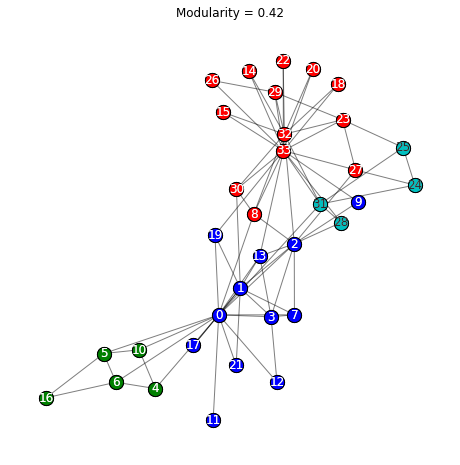

In [37]:
!pip3 install cdlib
import networkx as nx
import cdlib.algorithms as algo
import cdlib.viz as viz

# Let's look at the Zachary Karate Club
G = nx.karate_club_graph()
# Call the Louvain function, the result is a node_clustering object in the cdlib
# library

## To get random communities set " randomize = True "##
node_cluster = algo.louvain(G, randomize = False)
# We get the communities of this
com = node_cluster.communities
print(com)
# Then we'll use the cdlib functionality for vizualization
plt.figure(0)
viz.plot_network_clusters(G, node_cluster, plot_labels = True)
# We can also extract the modularity of this
mod = node_cluster.newman_girvan_modularity()
plt.title('Modularity = ' + str(round(mod.score,2)))

In [34]:
import cdlib.algorithms as cd
cd.louvain(G)

## Spectral Clustering

the communities are [[2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]]


Text(0.5, 1.0, 'Modularity = 0.36')

<Figure size 432x288 with 0 Axes>

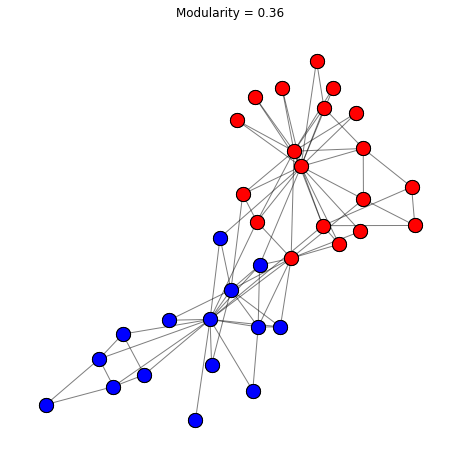

In [40]:
import networkx as nx
import cdlib.algorithms as algo
import cdlib.viz as viz
import matplotlib.pyplot as plt


# Let's look at the Zachary Karate Club
G = nx.karate_club_graph()
# Call the r_spectral_clustering function, the result is a node_clustering object in the cdlib
# library

# This will require the exact number of clusters that we want to test for
# method allows for some fine-tuning in both the method of k-means 
node_cluster = algo.r_spectral_clustering(G,n_clusters=2, method="vanilla")
# We get the communities of this
com = node_cluster.communities
print("the communities are", com)
# Then we'll use the cdlib functionality for vizualization
plt.figure(0)
viz.plot_network_clusters(G, node_cluster)
# We can also extract the modularity of this
mod = node_cluster.newman_girvan_modularity()
plt.title('Modularity = ' + str(round(mod.score,2))) 

# Interactive Elements of Colab (Optional)

In some of your projects, it might be nice to have a little interactivity. Luckily in Colab this isn't too difficult.

## Sliders

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# We'll define a funtion that plots the histogram of a Random graphs distribution
# and we'll add a slider that changes with differing values of p and N
def degree_distribution(N, p):
  G = nx.erdos_renyi_graph(n = N,p = p, seed = 0)
  plt.hist(nx.degree_histogram(G))
  plt.xlim = ((0,N))
  plt.ylim = ((0,1))
  plt.xticks(ticks = range(0,N+1))
  return 

from ipywidgets import interact, FloatSlider, IntSlider
interact(degree_distribution,N = IntSlider(min = 1, max = 100, step = 1),
                                     p=FloatSlider(min=0.0, max=1.0, step=0.01));

interactive(children=(IntSlider(value=1, description='N', min=1), FloatSlider(value=0.0, description='p', max=…